# 1. Cross Entrophy

In [2]:
import numpy as np
import pandas as pd

### Data

In [38]:
N = 100
D = 2

X = np.random.randn(N, D)

X[:50, :] = X[:50, :] - 2*np.ones((50,D))
X[50:, :] = X[50:, :] + 2*np.ones((50,D))

T = np.array([0.0]*50 + [1.0]*50)

In [39]:
ones = np.array([[1.0] * N]).T
Xb = np.concatenate((ones, X), axis=1)

In [40]:
# randomly initialize the weigths
w = np.random.randn(D + 1)
z = Xb.dot(w)

### Cross Entropy

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Y = sigmoid(z)

In [22]:
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [23]:
print(cross_entropy(T, Y))

2.90063477134


### Closed Form - Linear Discriminant Analysis

In [24]:
# cause we know 
w = np.array([0, 4, 4])
z = Xb.dot(w)
Y = sigmoid(z)

print(cross_entropy(T, Y))

0.481109324499


# 2. Logistic Classification Visualization

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

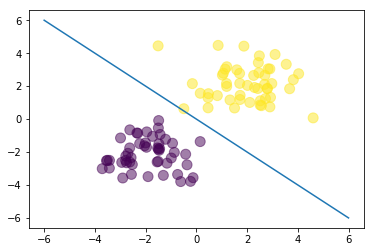

In [29]:
# Two Gaussian Clouds
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)

# 3. Gradient Descent

In [41]:
learning_rate = 0.1

for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))

    # Xb: N * D, T: N * 1, Y: N * 1, w: D*1
    w += learning_rate * np.dot((T - Y).T, Xb)
    Y = sigmoid(Xb.dot((w)))

print("Print w: ", w)    

0.481109324499
0.76258320972
0.450944098699
0.332828994561
0.268704742071
0.22762093272
0.198668223069
0.176969227926
0.159993866529
0.146288212185
Print w:  [-0.89841029  3.37222978  3.82669209]
